# Predspracovanie datasetu č.17

Andrea Dická, Ján Nemčík

## Pomocne funkcie

In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

In [2]:
def check_if_number(inputString):
    return any(char.replace('.','',1).isdigit() for char in str(inputString))

In [3]:
class Transform(TransformerMixin):
    def __init__(self, column, source, target):
        self.column = column
        self.source = source
        self.target = target
        
    def fit(self, df, y=None, **fit_params):
        return self
    
    def transform(self, df, **transform_params):
        sample = df[self.column] == self.source
        df.loc[sample, self.column] = self.target
        return df

In [4]:
from datetime import date
import datetime

def guess_date(string):
    for fmt in ["%Y/%m/%d", "%Y%m%d", "%y-%m-%d", "%Y-%m-%d", "%Y-%m-%d %H:%M:%S", "%Y-%m-%d %H %M %S", "%d/%m/%Y"]:
        try:
            return datetime.datetime.strptime(string, fmt).date()
        except ValueError:
            continue
    raise ValueError(string)

## Predspracovanie

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.pipeline import Pipeline
import matplotlib
import statistics
import sklearn

from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

data = pd.read_csv("17/train.csv", sep=',', header=None)
upraveny = pd.read_csv("17/train.csv", sep=',', header=None)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [6]:
upraveny = data.rename(columns=data.iloc[0]).drop(data.index[0])
upraveny.head()

,nan,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
1,0.0,53.0,M,f,f,f,f,f,f,0.3,t,1.2,t,105.0,0.91,t,115,f,?,SVHC,negative.|232,Private,90021,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
2,1.0,73.0,M,f,f,f,f,f,f,2.1,t,1.9,t,118.0,0.9,t,131,f,?,SVI,negative.|3255,Private,97411,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
3,2.0,73.0,F,f,f,f,f,f,f,1.6,t,2.0,t,105.0,1.17,t,89,f,?,SVI,negative.|322,Local-gov,89491,Masters,14,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
4,3.0,24.0,M,f,f,f,f,f,f,1.3,t,1.7,t,106.0,1.0,t,106,f,?,SVHC,negative.|2462,Private,279636,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
5,4.0,25.0,F,f,f,f,f,f,f,468.0,t,0.7,t,21.0,1.1,t,19,f,?,other,negative.|3047,Private,172577,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,0,0,44,United-States,1992-08-27,"{'goitre':'f','TSH measured':'t','pregnant':'f..."


In [7]:
import json

lst = []

for a in upraveny['medical_info']:
    a = a.replace("'", '"')
    record = json.loads(a)
    lst.append(record)
    
df = pd.DataFrame(lst)
df

result = pd.concat([upraveny, df], axis=1)
upraveny = result
upraveny.head()

,nan,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info,T4U measured,TSH measured,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,f,f,f,f,f,f,f
1,0.0,53.0,M,f,f,f,f,f,f,0.3,t,1.2,t,105.0,0.91,t,115,f,?,SVHC,negative.|232,Private,90021,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,f,f,f,f,f,f
2,1.0,73.0,M,f,f,f,f,f,f,2.1,t,1.9,t,118.0,0.9,t,131,f,?,SVI,negative.|3255,Private,97411,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,f,f,f,f,f,t
3,2.0,73.0,F,f,f,f,f,f,f,1.6,t,2.0,t,105.0,1.17,t,89,f,?,SVI,negative.|322,Local-gov,89491,Masters,14,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,f,f,f,f,f,f
4,3.0,24.0,M,f,f,f,f,f,f,1.3,t,1.7,t,106.0,1.0,t,106,f,?,SVHC,negative.|2462,Private,279636,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,F,f,f,f,f,f


Odstranime nepotrebne stlpce

In [8]:
upraveny = upraveny.iloc[1:]
upraveny = upraveny.drop(upraveny.columns[[0]], axis=1)
del upraveny['TBG']
del upraveny['TBG measured']
del upraveny['medical_info']
upraveny[['class','class_id']] = upraveny['class'].str.split('|',expand=True)
upraveny.head()

,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,T4U measured,TSH measured,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id
1,53.0,M,f,f,f,f,f,f,0.3,t,1.2,t,105.0,0.91,t,115,SVHC,negative.,Private,90021,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,t,t,f,f,f,f,f,f,f,f,232
2,73.0,M,f,f,f,f,f,f,2.1,t,1.9,t,118.0,0.9,t,131,SVI,negative.,Private,97411,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,t,t,f,f,f,f,f,f,f,t,3255
3,73.0,F,f,f,f,f,f,f,1.6,t,2.0,t,105.0,1.17,t,89,SVI,negative.,Local-gov,89491,Masters,14,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,t,t,f,f,f,f,f,f,f,f,322
4,24.0,M,f,f,f,f,f,f,1.3,t,1.7,t,106.0,1.0,t,106,SVHC,negative.,Private,279636,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,t,t,f,f,F,f,f,f,f,f,2462
5,25.0,F,f,f,f,f,f,f,468.0,t,0.7,t,21.0,1.1,t,19,other,negative.,Private,172577,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,0,0,44,United-States,1992-08-27,t,t,f,f,F,f,f,f,f,f,3047


### Oprava formatov dat

V nasledujucej casti opravujeme a zjednocujeme formaty dat:
Napr. v stlpci referral source zjednotime sVHD a SVHD na svhd, alebo datumy narodeni zjednotime na jednotny format

#### Stlpec age

In [9]:
upraveny['age'].unique()

array(['53.0', '73.0', '24.0', '25.0', '60.0', '32.0', '71.0', '27.0',
       '64.0', '65.0', '34.0', '51.0', '62.0', '42.0', '47.0', '30.0',
       '75.0', '35.0', '36.0', '39.0', '7200.0', '72.0', '79.0', '40.0',
       '38.0', '48.0', '50.0', '23.0', '81.0', '43.0', '57.0', '77.0',
       '56.0', '59.0', '67.0', '58.0', '2500.0', '18.0', '22.0', '1800.0',
       '55.0', '63.0', '46.0', '29.0', '74.0', '66.0', '90.0', '2.0',
       '5000.0', '70.0', '13.0', '5500.0', '69.0', '4500.0', '68.0',
       '17.0', '31.0', '-4800.0', '44.0', '78.0', '-7700.0', '52.0',
       '89.0', '49.0', '19.0', '28.0', '21.0', '20.0', '54.0', '87.0',
       '-5800.0', '26.0', '-6600.0', '61.0', '41.0', '-3600.0', '76.0',
       '15.0', '-7300.0', '37.0', '6000.0', '-8700.0', '45.0', '2100.0',
       '12.0', '-3300.0', '83.0', '16.0', '6400.0', '4300.0', '84.0',
       '2000.0', '85.0', '5700.0', '-3900.0', '-5700.0', '-3700.0',
       '86.0', '100.0', '3700.0', '33.0', '-6200.0', '8300.0', '93.0',
      

**Oprava age**:
1. Zaporne hodnoty zmenime na kladne
2. Vek > 100 dame deleno 10, vek > 1000 dame deleno 100

In [32]:
def check_if_number(inputString):
    return any(char.replace('.','',1).isdigit() for char in str(inputString))

iterator = 0
for age in upraveny['age']:
    if (check_if_number(age)):
        age = int(float(age))
        age = abs(age)
        if age >= 1000:
            age = age/100
        
        elif age >= 100:
            age = age/10

        age = int(age)
    
    else:
        age = -1
    
    age = int(float(age))
    
    upraveny.age[iterator] = age
    iterator += 1

In [33]:
upraveny['age'].unique()

array([24, 25, 60, 32, 71, 27, 64, 65, 34, 51, 62, 53, 42, 47, 30, 75, 35,
       36, 39, 72, 79, 40, 38, 48, 50, 23, 81, 43, 57, 77, 56, 59, 67, 58,
       18, 22, 55, 63, 46, 29, 74, 66, 90, 73, 2, 70, 13, 69, 45, 68, 17,
       31, 44, 78, 52, 89, 49, 19, 28, 21, 20, 54, 87, 26, 61, 41, 76, 15,
       37, 12, 33, 83, 16, 84, 85, 86, 10, 93, 80, 91, 1, 4, 14, 82, 88,
       8, 94, 7, 11, 92, 5, 6], dtype=object)

#### Stlpec referral source

In [12]:
upraveny["referral source"].unique()

array(['SVHC', 'SVI', 'other', 'Other', 'sVHC', 'sVI', 'STMW', 'SVHD',
       'sTMW', 'sVHD'], dtype=object)

In [13]:
upraveny["referral source"].value_counts()

other    1464
SVI       698
SVHC      247
Other     168
STMW       83
sVI        73
sVHC       28
SVHD       28
sTMW        8
sVHD        3
Name: referral source, dtype: int64

In [14]:
ppl = Pipeline([
              ('name1', Transform('referral source', 'SVHC', 'svhc')),
              ('name2', Transform('referral source', 'SVI', 'svi')),
              ('name3', Transform('referral source', 'Other', 'other')),
              ('name4', Transform('referral source', 'sVHC', 'svhc')),
              ('name5', Transform('referral source', 'sVI', 'svi')),
              ('name6', Transform('referral source', 'STMW', 'stmw')),
              ('name7', Transform('referral source', 'SVHD', 'svhd')),
              ('name8', Transform('referral source', 'sTMW', 'stmw')),
              ('name9', Transform('referral source', 'sVHD', 'svhd')),
      ])

model = ppl.fit(upraveny)
upraveny = model.transform(upraveny)
upraveny['referral source'].unique()

array(['svhc', 'svi', 'other', 'stmw', 'svhd'], dtype=object)

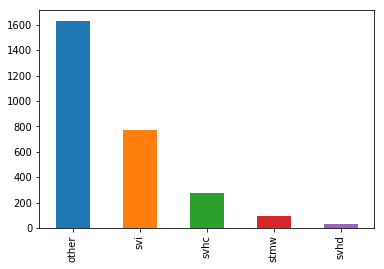

In [15]:
upraveny['referral source'].value_counts().plot(kind='bar')

#### Stlpec relationship

In [16]:
upraveny['relationship'].unique()

array([' Husband', ' Not-in-family', ' Not_in_family', ' Wife',
       ' Own-child', ' Unmarried', ' Other-relative', ' Other_relative',
       ' Own_child'], dtype=object)

In [17]:
for i, rel in upraveny['relationship'].iteritems():
    rel = rel.strip()
    upraveny['relationship'][i] = rel

line = Pipeline([
              ('r1', Transform('relationship', 'Not_in_family', 'Not-in-family')),
              ('r2', Transform('relationship', 'Own_child', 'Own-child')),
              ('r3', Transform('relationship', 'Other_relative', 'Other-relative')),
      ])

model = line.fit(upraveny)
upraveny = model.transform(upraveny)

upraveny['relationship'].unique()

array(['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

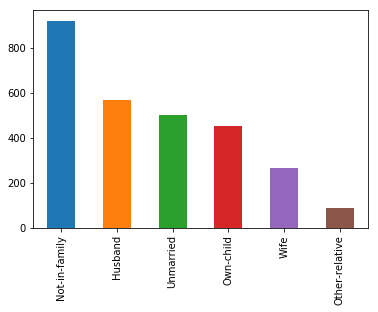

In [18]:
upraveny['relationship'].value_counts().plot(kind='bar')

#### Stlpec race

Odstranenie zaciatocnych bielych znakov

In [19]:
upraveny['race'].unique()

array([' White', ' Asian-Pac-Islander', ' Black', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [20]:
for i,race in upraveny['race'].iteritems():
    race = race.strip()
    upraveny['race'][i] = race

upraveny['race'].unique()

array(['White', 'Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

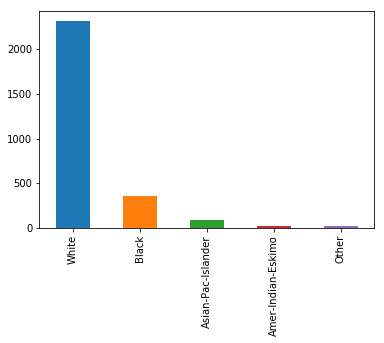

In [21]:
upraveny['race'].value_counts().plot(kind='bar')

#### Stlpec native-country

Odstranenie zaciatocnych bielych znakov

In [22]:
upraveny['native-country'].unique()

array([' ?', ' Laos', ' United-States', ' Guatemala', ' Puerto-Rico',
       ' Mexico', ' Ireland', ' Cuba', ' Honduras', ' Italy',
       ' Dominican-Republic', ' Peru', ' Canada', ' Portugal',
       ' Philippines', ' South', ' Jamaica', ' India', ' France',
       ' Germany', ' England', ' Outlying-US(Guam-USVI-etc)', ' Poland',
       ' Ecuador', ' Columbia', ' China', ' El-Salvador', ' Cambodia',
       ' Japan', ' Thailand', ' Haiti', ' Iran', ' Hungary', ' Vietnam',
       ' Yugoslavia', ' Taiwan', ' Nicaragua', ' Hong', ' Scotland',
       ' Greece'], dtype=object)

In [23]:
for i,race in upraveny['native-country'].iteritems():
    race = race.strip()
    upraveny['native-country'][i] = race

upraveny['native-country'].unique()

array(['?', 'Laos', 'United-States', 'Guatemala', 'Puerto-Rico', 'Mexico',
       'Ireland', 'Cuba', 'Honduras', 'Italy', 'Dominican-Republic',
       'Peru', 'Canada', 'Portugal', 'Philippines', 'South', 'Jamaica',
       'India', 'France', 'Germany', 'England',
       'Outlying-US(Guam-USVI-etc)', 'Poland', 'Ecuador', 'Columbia',
       'China', 'El-Salvador', 'Cambodia', 'Japan', 'Thailand', 'Haiti',
       'Iran', 'Hungary', 'Vietnam', 'Yugoslavia', 'Taiwan', 'Nicaragua',
       'Hong', 'Scotland', 'Greece'], dtype=object)

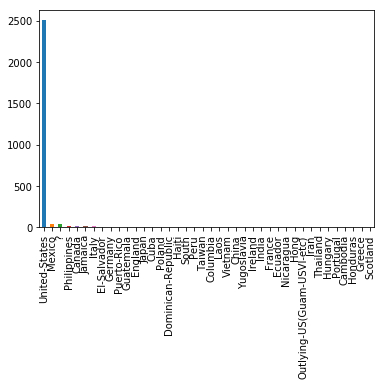

In [24]:
upraveny['native-country'].value_counts().plot(kind='bar')

#### Stlpec date_of_birth

Zjednotenie formatov datumov

In [25]:
for i,date in upraveny['date_of_birth'].iteritems():
    
    if(str(date) != 'nan'):        
        aa = guess_date(str(date))
        upraveny['date_of_birth'][i] = aa

upraveny['date_of_birth'].head(15)

1     1965-01-22
2     1944-04-01
3     2045-03-12
4     1993-12-26
5     1992-08-27
6     1958-02-13
7     1985-07-26
8     1946-06-21
9     1990-06-02
10    1953-06-30
11    1952-04-08
12    1984-02-08
13    1966-08-06
14    1994-03-08
15    1956-03-19
Name: date_of_birth, dtype: object

#### Slpec on thyroxine

Uprava na jednotny format (t,f)

In [26]:
upraveny['on thyroxine'].unique()

array(['f', 'F', 't', 'T', 'TRUE', 'FALSE', nan], dtype=object)

In [27]:
line = Pipeline([
              ('ot1', Transform('on thyroxine', 'F', 'f')),
              ('ot2', Transform('on thyroxine', 'T', 't')),
              ('ot3', Transform('on thyroxine', 'FALSE', 'f')),
              ('ot4', Transform('on thyroxine', 'TRUE', 't')),
      ])

model = line.fit(upraveny)
upraveny = model.transform(upraveny)

upraveny['on thyroxine'].unique()

array(['f', 't', nan], dtype=object)

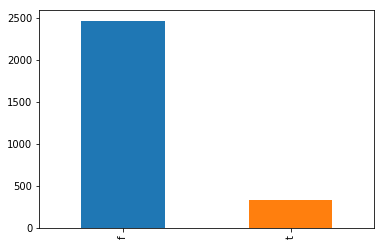

In [28]:
upraveny['on thyroxine'].value_counts().plot(kind='bar')

## Chybajuce a vychylene hodnoty v numerickych stlpcoch

V stlpci **age** sa v testovacich datach nachadza iba 1 udaj, ktory chyba a ktory nevieme nahradit podla datumu narodenia, ktory tiez chyba. Rozhodli sme sa ho nahradit priemernym vekom

In [34]:
for i, age in upraveny['age'].iteritems():
    if age == -1:
        age = upraveny['age'].mean()
        upraveny['age'][i] = int(age)

upraveny['age'].unique()

array([24, 25, 60, 32, 71, 27, 64, 65, 34, 51, 62, 53, 42, 47, 30, 75, 35,
       36, 39, 72, 79, 40, 38, 48, 50, 23, 81, 43, 57, 77, 56, 59, 67, 58,
       18, 22, 55, 63, 46, 29, 74, 66, 90, 73, 2, 70, 13, 69, 45, 68, 17,
       31, 44, 78, 52, 89, 49, 19, 28, 21, 20, 54, 87, 26, 61, 41, 76, 15,
       37, 12, 33, 83, 16, 84, 85, 86, 10, 93, 80, 91, 1, 4, 14, 82, 88,
       8, 94, 7, 11, 92, 5, 6], dtype=object)

### TSH a TSH measured

In [35]:
upraveny['TSH'].unique()

array(['0.3', '2.1', '1.6', '1.3', '468.0', '1.1', nan, '2.4', '0.02',
       '3.5', '2.5', '2.3', '1.9', '1.8', '0.85', '0.2', '7.2', '0.72',
       '2.6', '7.3', '0.05', '2.8', '1.4', '0.03', '76.0', '0.9', '0.5',
       '1.2', '2.0', '4.1', '11.0', '1.5', '0.4', '60.0', '0.8', '5.2',
       '4.8', '0.1', '2.7', '4.4', '0.015', '4.7', '0.025', '28.0',
       '0.065', '5.1', '0.68', '0.15', '0.6', '5.8', '3.0', '6.3',
       '0.045', '0.75', '0.88', '1.7', '0.84', '0.74', '41.0', '3.9',
       '0.97', '0.41', '8.6', '4.9', '0.92', '46.0', '9.4', '0.91', '2.2',
       '16.0', '38.0', '6.5', '0.86', '0.01', '0.005', '0.31', '0.32',
       '0.25', '1.0', '0.58', '478.0', '0.19', '0.035', '0.71', '0.7',
       '0.87', '0.35', '4.2', '5.0', '5.4', '3.7', '4.5', '13.0', '8.3',
       '2.9', '472.0', '55.0', '14.0', '3.8', '0.08', '0.29', '0.52',
       '0.46', '0.04', '0.93', '61.0', '4.0', '35.0', '7.1', '183.0',
       '0.76', '160.0', '0.95', '5.5', '0.09', '6.4', '9.9', '7.5',
       '3

In [36]:
upraveny['TSH measured'].value_counts()

t    2515
f     284
Name: TSH measured, dtype: int64

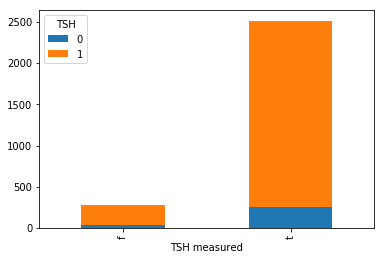

In [37]:
lst = upraveny['TSH'].copy()

for i,a in upraveny['TSH'].iteritems():
    if float(a) > 0.0:
        lst[i] = 1
    else:
        lst[i] = 0
        
pd.crosstab(index=upraveny['TSH measured'], columns=lst).plot.bar(stacked=True)

Z grafu vidime, ze pri TSH a TSH measured mame nekonzistentne data - tam, kde sme zaznamenali, ze TSH sa nemeralo (TSH measured bolo false), tak v stlpci TSH predsa len nejaka namerana hodnota bola a naopak. Potrebujeme to opravit

In [38]:
for i, value in upraveny['TSH'].iteritems():
    if float(value) > 0:
        upraveny['TSH measured'][i] = 't'
    else:
        upraveny['TSH measured'][i] = 'f'

lst = upraveny['TSH'].copy()

for i,a in upraveny['TSH'].iteritems():
    if float(a) > 0.0:
        lst[i] = 1
    else:
        lst[i] = 0

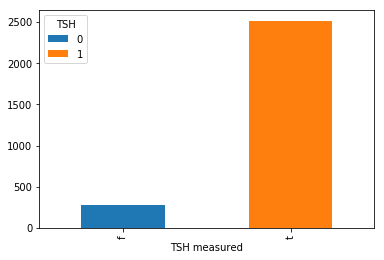

In [39]:
pd.crosstab(index=upraveny['TSH measured'], columns=lst).plot.bar(stacked=True)

### T3 a T3 measured

In [40]:
upraveny['T3'].unique()

array(['1.2', '1.9', '2.0', '1.7', '0.7', nan, '5.3', '1.8', '2.5', '2.2',
       '2.1', '2.3', '5.0', '1.5', '3.8', '3.0', '1.4', '2.6', '1.6',
       '0.9', '0.5', '2.9', '2.7', '3.1', '1.1', '2.8', '0.6', '2.4',
       '0.2', '3.4', '1.3', '0.4', '1.0', '3.7', '4.3', '3.3', '0.05',
       '3.6', '4.8', '4.2', '4.6', '0.8', '6.2', '3.9', '4.1', '0.3',
       '5.4', '3.2', '5.5', '4.0', '7.1', '3.5', '0.1', '4.4', '7.0',
       '4.5', '7.3', '5.2', '10.6', '6.7', '5.1', '4.9', '4.7', '6.1',
       '6.0'], dtype=object)

In [41]:
upraveny['T3 measured'].unique()

array(['t', 'f'], dtype=object)

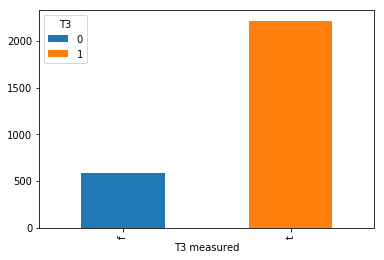

In [42]:
lstT3 = upraveny['T3'].copy()

for i,a in upraveny['T3'].iteritems():
    if float(a) > 0.0:
        lstT3[i] = 1
    else:
        lstT3[i] = 0
        
pd.crosstab(index=upraveny['T3 measured'], columns=lstT3).plot.bar(stacked=True)

In [43]:
# tu to netreba opravovat

### TT4 a TT4 measured

In [44]:
upraveny['TT4'].unique()

array(['105.0', '118.0', '106.0', '21.0', '90.0', '134.0', '133.0',
       '272.0', '72.0', '137.0', '121.0', '74.0', '91.0', '92.0', '103.0',
       '223.0', '123.0', '89.0', '85.0', '140.0', '125.0', '117.0',
       '111.0', '109.0', '87.0', '93.0', '122.0', '131.0', '95.0',
       '150.0', '83.0', '22.0', '136.0', '102.0', '78.0', '151.0',
       '110.0', '152.0', '107.0', nan, '183.0', '14.0', '80.0', '187.0',
       '169.0', '82.0', '97.0', '94.0', '71.0', '96.0', '145.0', '33.0',
       '129.0', '101.0', '162.0', '159.0', '100.0', '130.0', '119.0',
       '115.0', '48.0', '62.0', '116.0', '81.0', '149.0', '84.0', '59.0',
       '86.0', '144.0', '63.0', '104.0', '56.0', '189.0', '164.0', '68.0',
       '37.0', '88.0', '198.0', '252.0', '132.0', '99.0', '77.0', '38.0',
       '45.0', '124.0', '142.0', '98.0', '160.0', '120.0', '76.0',
       '154.0', '113.0', '157.0', '32.0', '54.0', '158.0', '430.0',
       '213.0', '139.0', '210.0', '46.0', '34.0', '168.0', '255.0',
       '79.0'

In [45]:
upraveny['TT4 measured'].unique()

array(['t', 'f'], dtype=object)

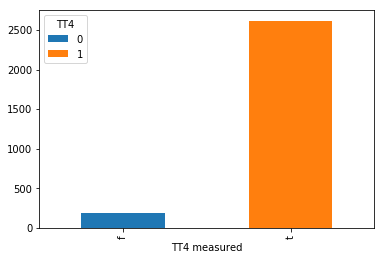

In [46]:
lstTT4 = upraveny['TT4'].copy()

for i,a in upraveny['TT4'].iteritems():
    if float(a) > 0.0:
        lstTT4[i] = 1
    else:
        lstTT4[i] = 0
        
pd.crosstab(index=upraveny['TT4 measured'], columns=lstTT4).plot.bar(stacked=True)

In [47]:
# aj tt4 je pekne

### Stlpec T4U a T4U measured

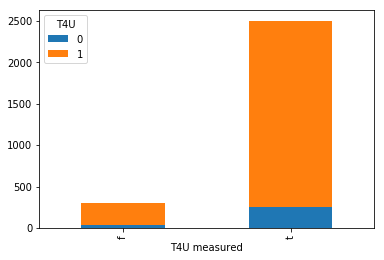

In [48]:
lstT4U = upraveny['T4U'].copy()

for i,a in upraveny['T4U'].iteritems():
    if float(a) > 0.0:
        lstT4U[i] = 1
    else:
        lstT4U[i] = 0
        
pd.crosstab(index=upraveny['T4U measured'], columns=lstT4U).plot.bar(stacked=True)

In [49]:
for i, value in upraveny['T4U'].iteritems():
    if float(value) > 0:
        upraveny['T4U measured'][i] = 't'
    else:
        upraveny['T4U measured'][i] = 'f'

lstT4U = upraveny['T4U'].copy()

for i,a in upraveny['T4U'].iteritems():
    if float(a) > 0.0:
        lstT4U[i] = 1
    else:
        lstT4U[i] = 0

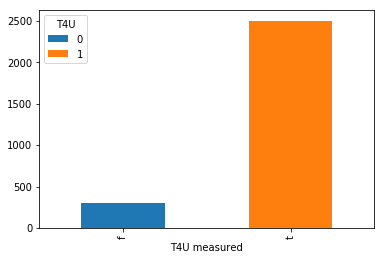

In [50]:
pd.crosstab(index=upraveny['T4U measured'], columns=lstT4U).plot.bar(stacked=True)

### Stlpec FTI a FTI measured

In [51]:
upraveny['FTI'].unique() # treba opravit ? na 0

array(['115', '131', '89', '106', '19', '84', '104', '123', '281', '129',
       '94', '81', '98', '97', '111', '88', '85', '90', '121', '169',
       '105', '122', '144', '145', '69', '99', '119', '116', '92', '114',
       '86', '153', '127', '93', '?', '141', '13', '110', '197', '143',
       '125', '63', '80', '107', '155', '47', '136', '117', '103', '146',
       '112', '166', '87', '64', '91', '113', '95', '41', '109', '79',
       '83', '108', '102', '124', '120', '66', '49', '137', '118', '151',
       '176', '67', '50', '198', '132', '222', '152', '71', '149', '100',
       '101', '73', '34', '96', '82', '133', '140', '170', '172', '156',
       '154', '395', '190', '77', '51', '78', '161', '29', '171', '244',
       '43', '74', '62', '134', '165', '139', '195', '11', '75', '157',
       '46', '8.9', '138', '247', '159', '204', '167', '168', '160',
       '126', '163', '148', '135', '76', '70', '72', '57', '128', '224',
       '54', '253', '2', '232', '174', '158', '173', '130

In [52]:
fti = Pipeline([
              ('ot1', Transform('FTI', '?', '0')),
      ])

model = fti.fit(upraveny)
upraveny = model.transform(upraveny)

upraveny['FTI'].unique()

array(['115', '131', '89', '106', '19', '84', '104', '123', '281', '129',
       '94', '81', '98', '97', '111', '88', '85', '90', '121', '169',
       '105', '122', '144', '145', '69', '99', '119', '116', '92', '114',
       '86', '153', '127', '93', '0', '141', '13', '110', '197', '143',
       '125', '63', '80', '107', '155', '47', '136', '117', '103', '146',
       '112', '166', '87', '64', '91', '113', '95', '41', '109', '79',
       '83', '108', '102', '124', '120', '66', '49', '137', '118', '151',
       '176', '67', '50', '198', '132', '222', '152', '71', '149', '100',
       '101', '73', '34', '96', '82', '133', '140', '170', '172', '156',
       '154', '395', '190', '77', '51', '78', '161', '29', '171', '244',
       '43', '74', '62', '134', '165', '139', '195', '11', '75', '157',
       '46', '8.9', '138', '247', '159', '204', '167', '168', '160',
       '126', '163', '148', '135', '76', '70', '72', '57', '128', '224',
       '54', '253', '2', '232', '174', '158', '173', '130

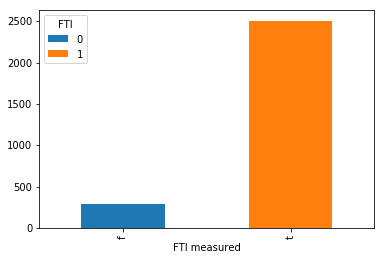

In [53]:
lstFTI = upraveny['FTI'].copy()

for i,a in upraveny['FTI'].iteritems():
    if float(a) > 0.0:
        lstFTI[i] = 1
    else:
        lstFTI[i] = 0
        
pd.crosstab(index=upraveny['FTI measured'], columns=lstFTI).plot.bar(stacked=True)

In [54]:
#fti je ok

### TSH, T4U, FTI, TT4 a T3

#### TSH

In [55]:
upraveny['TSH'].count()

2516

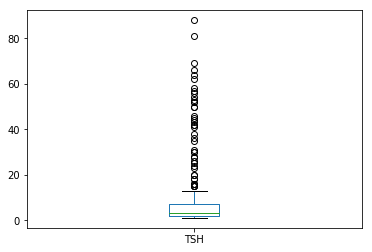

In [60]:
upraveny['TSH'].value_counts().plot(kind='box')

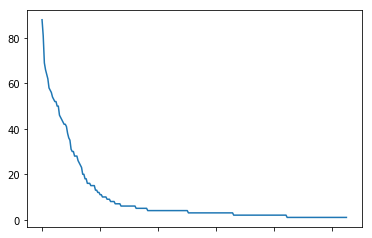

In [56]:
upraveny['TSH'].value_counts().plot(kind='line')

In [58]:
upraveny['TSH'].unique()

array(['0.3', '2.1', '1.6', '1.3', '468.0', '1.1', nan, '2.4', '0.02',
       '3.5', '2.5', '2.3', '1.9', '1.8', '0.85', '0.2', '7.2', '0.72',
       '2.6', '7.3', '0.05', '2.8', '1.4', '0.03', '76.0', '0.9', '0.5',
       '1.2', '2.0', '4.1', '11.0', '1.5', '0.4', '60.0', '0.8', '5.2',
       '4.8', '0.1', '2.7', '4.4', '0.015', '4.7', '0.025', '28.0',
       '0.065', '5.1', '0.68', '0.15', '0.6', '5.8', '3.0', '6.3',
       '0.045', '0.75', '0.88', '1.7', '0.84', '0.74', '41.0', '3.9',
       '0.97', '0.41', '8.6', '4.9', '0.92', '46.0', '9.4', '0.91', '2.2',
       '16.0', '38.0', '6.5', '0.86', '0.01', '0.005', '0.31', '0.32',
       '0.25', '1.0', '0.58', '478.0', '0.19', '0.035', '0.71', '0.7',
       '0.87', '0.35', '4.2', '5.0', '5.4', '3.7', '4.5', '13.0', '8.3',
       '2.9', '472.0', '55.0', '14.0', '3.8', '0.08', '0.29', '0.52',
       '0.46', '0.04', '0.93', '61.0', '4.0', '35.0', '7.1', '183.0',
       '0.76', '160.0', '0.95', '5.5', '0.09', '6.4', '9.9', '7.5',
       '3

In [ ]:
upraveny['TSH'].value_counts().mean()

In [ ]:
mean = upraveny['TSH'].value_counts().mean()

upraveny['TSH'] = upraveny['TSH'].fillna(mean)
        


In [ ]:
upraveny['TSH'].value_counts().plot(kind='line')

In [ ]:
upraveny['TSH'].count()

In [ ]:
upraveny['T4U'].value_counts().plot(kind='line')

In [ ]:
upraveny['FTI'].value_counts().plot(kind='line')

In [ ]:
upraveny['TT4'].value_counts().plot(kind='line')

In [ ]:
upraveny['T3'].value_counts().plot(kind='line')

In [ ]:
dataframe = pd.DataFrame()
dataframe = dataframe.append(upraveny['TSH'])
dataframe = dataframe.append(upraveny['T4U'])
dataframe = dataframe.append(upraveny['FTI'])
dataframe = dataframe.append(upraveny['TT4'])
dataframe = dataframe.append(upraveny['T3'])

## Zistenie relevantnych stlpcov pre predikciu class

Nepotrebujeme opravit hodnoty (chybajuce, vychylene) v celom datasete, ale iba pre relevantne stlpce, s ktorymi budeme dalej pracovat a ktore nam predikuju **class**

In [ ]:
#vytvorenie dataframe iba s numerickymi hodnotami

